# Greeks and Implied Volatility

In [241]:
using CSV, Tables
using DelimitedFiles, DataFrames
using Statistics
import PyPlot as plt
using Plots
using GLM
using ShiftedArrays
using PyCall
using PlotlyJS
using FinancialToolbox
using FinancialDerivatives
using RCall
using LsqFit
using BusinessDays, Dates
using LaTeXStrings

yf = pyimport("yfinance")

PyObject <module 'yfinance' from '/home/aidin/anaconda3/lib/python3.8/site-packages/yfinance/__init__.py'>

In [242]:
K = 100
r = .01
vol = 0.2

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price1  = Array{Float64}(undef, length(S), length(T))
delta1  = Array{Float64}(undef, length(S), length(T))
gamma1  = Array{Float64}(undef, length(S), length(T))
theta1  = Array{Float64}(undef, length(S), length(T))
vega1   = Array{Float64}(undef, length(S), length(T))
rho1    = Array{Float64}(undef, length(S), length(T))
lambda1 = Array{Float64}(undef, length(S), length(T))
psi1    = Array{Float64}(undef, length(S), length(T))
vanna1  = Array{Float64}(undef, length(S), length(T))
impv1   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price1[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta1[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma1[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta1[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega1[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho1[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda1[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi1[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna1[i,j]  = blsvanna( S[i], K, r, T[j], vol)
    impv1[i,j]   = blsimpv(  S[i], K, r, T[j], price1[i,j] )
end

In [243]:
my_cg = cgrad([:blue, :orange])

ColorGradient(RGBA{Float64}[RGBA{Float64}(0.0,0.0,1.0,1.0), RGBA{Float64}(1.0,0.6470588235294118,0.0,1.0)], [0.0, 1.0])

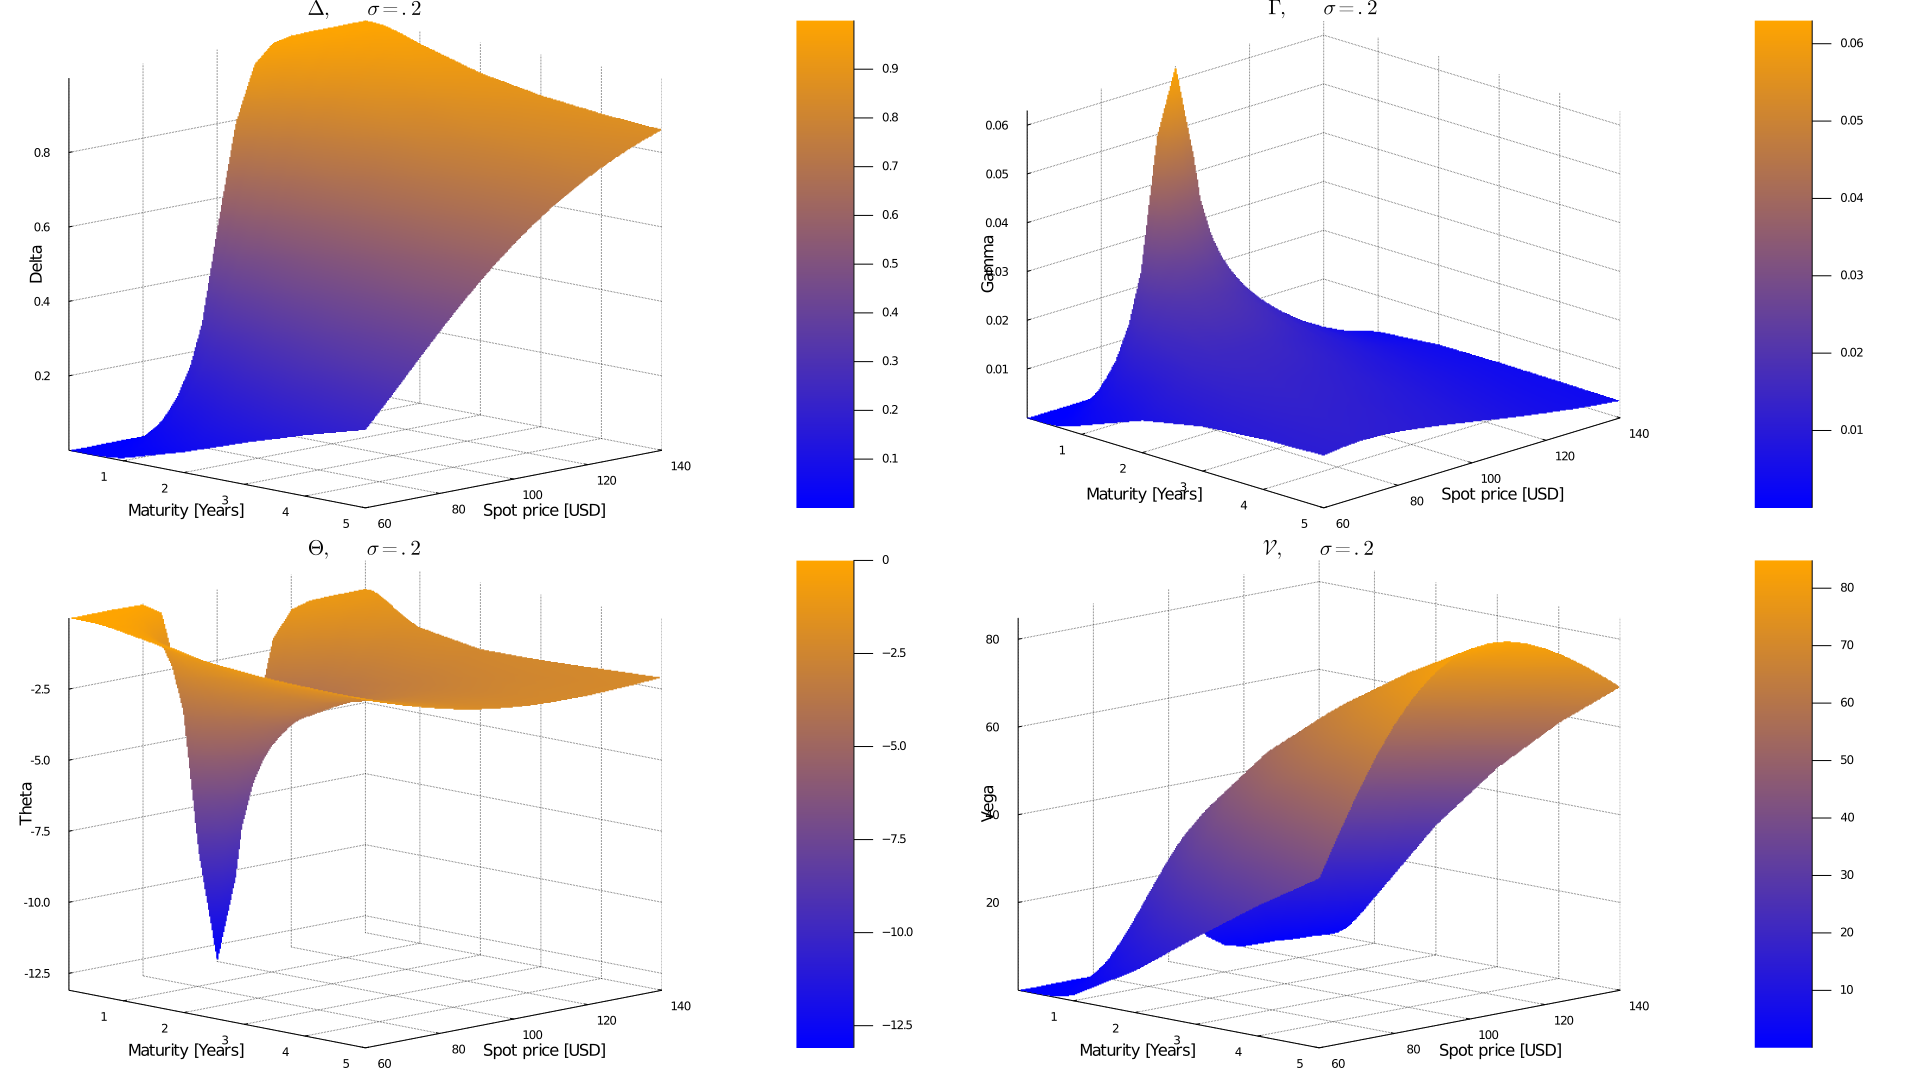

In [244]:
plot_price1 = Plots.plot(title = L"Price,\quad\quad\sigma=.2",T, S, price1,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta1 = Plots.plot(title = L"\Delta,\quad\quad\sigma=.2",T, S, delta1,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma1 = Plots.plot(title = L"\Gamma,\quad\quad\sigma=.2",T, S, gamma1,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta1 = Plots.plot(title = L"\Theta,\quad\quad\sigma=.2",T, S, theta1,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega1  = Plots.plot(title = L"\mathcal{V},\quad\quad\sigma=.2",T, S, vega1, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")
plot_impv1  = Plots.plot(T, S, impv1, color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Implied volatility")

Plots.plot(plot_delta1, plot_gamma1, plot_theta1, plot_vega1, layout = (2, 2), size = (1920, 1080))
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


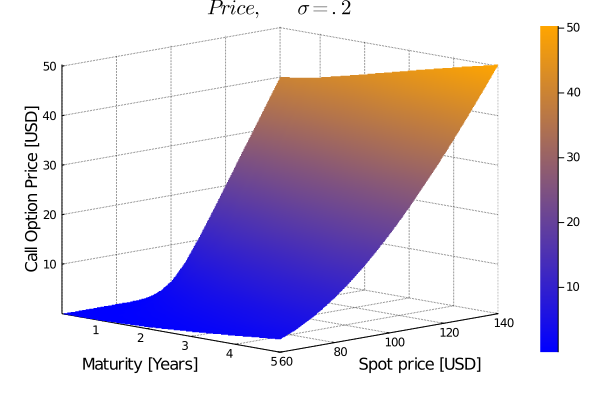

In [245]:
Plots.plot(plot_price1)
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


In [246]:
K = 100
r = .01
vol = 0.75

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price2  = Array{Float64}(undef, length(S), length(T))
delta2  = Array{Float64}(undef, length(S), length(T))
gamma2  = Array{Float64}(undef, length(S), length(T))
theta2  = Array{Float64}(undef, length(S), length(T))
vega2   = Array{Float64}(undef, length(S), length(T))
rho2    = Array{Float64}(undef, length(S), length(T))
lambda2 = Array{Float64}(undef, length(S), length(T))
psi2    = Array{Float64}(undef, length(S), length(T))
vanna2  = Array{Float64}(undef, length(S), length(T))
impv2   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price2[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta2[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma2[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta2[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega2[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho2[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda2[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi2[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna2[i,j]  = blsvanna( S[i], K, r, T[j], vol)
    impv2[i,j]   = blsimpv(  S[i], K, r, T[j], price2[i,j] )
end

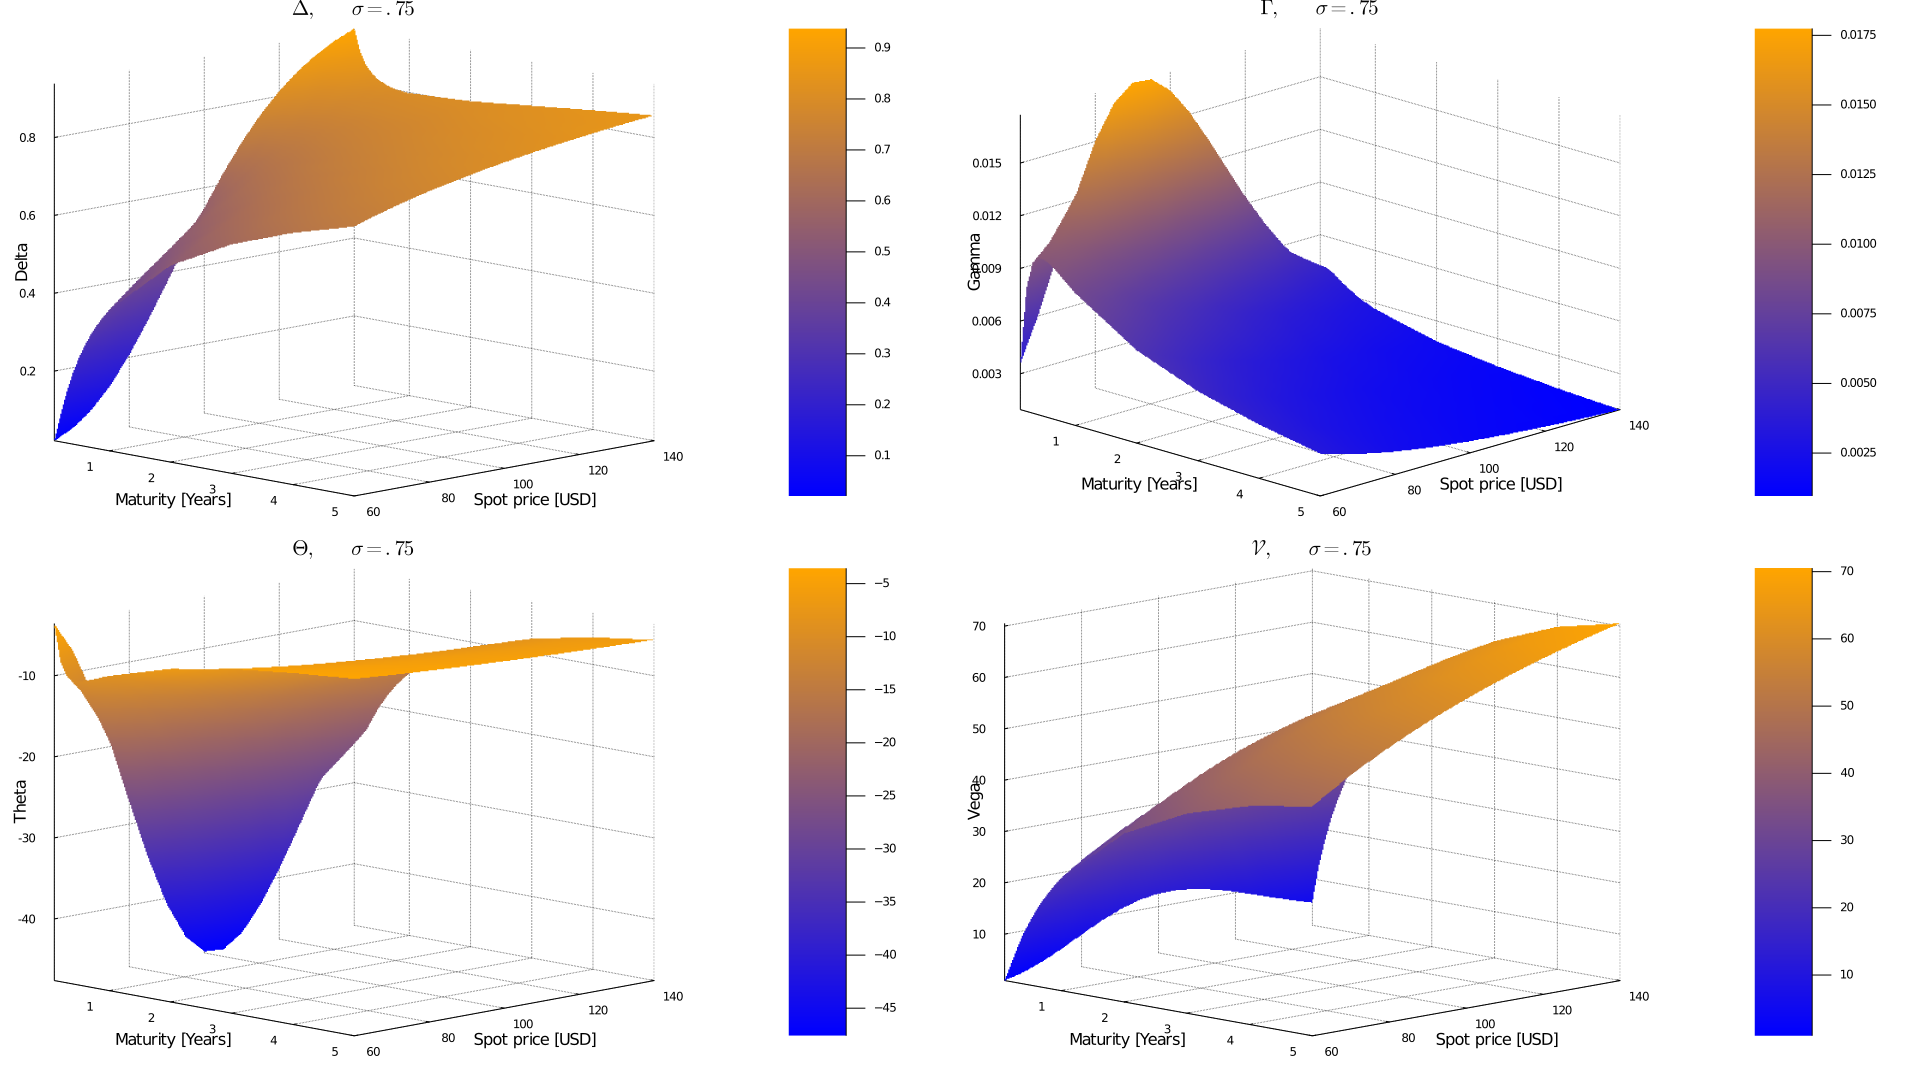

In [247]:
plot_price2 = Plots.plot(title = L"Price,\quad\quad\sigma=.75"      ,T, S, price2,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta2 = Plots.plot(title = L"\Delta,\quad\quad\sigma=.75"     ,T, S, delta2,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma2 = Plots.plot(title = L"\Gamma,\quad\quad\sigma=.75"     ,T, S, gamma2,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta2 = Plots.plot(title = L"\Theta,\quad\quad\sigma=.75"     ,T, S, theta2,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega2  = Plots.plot(title = L"\mathcal{V},\quad\quad\sigma=.75",T, S, vega2, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")
plot_impv2  = Plots.plot(T, S, impv2, color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Implied volatility")




Plots.plot(plot_delta2, plot_gamma2, plot_theta2, plot_vega2, layout = (2, 2), size = (1920, 1080))
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)

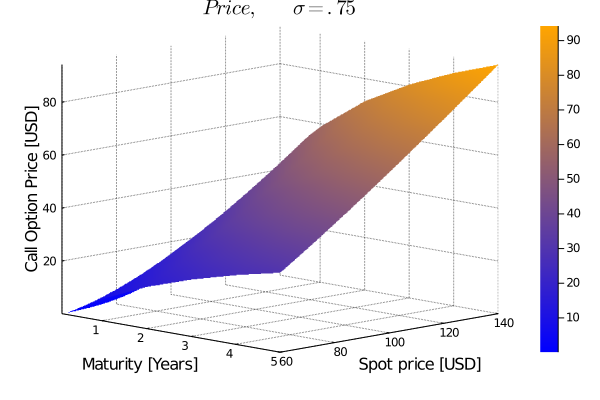

In [248]:
Plots.plot(plot_price2)
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


In [249]:
K = 100
r = .01
vol = 0.05

S = collect(60:5:140)
T = vcat(collect(.1:.1:.9), collect(1:1:5))

price3  = Array{Float64}(undef, length(S), length(T))
delta3  = Array{Float64}(undef, length(S), length(T))
gamma3  = Array{Float64}(undef, length(S), length(T))
theta3  = Array{Float64}(undef, length(S), length(T))
vega3   = Array{Float64}(undef, length(S), length(T))
rho3    = Array{Float64}(undef, length(S), length(T))
lambda3 = Array{Float64}(undef, length(S), length(T))
psi3    = Array{Float64}(undef, length(S), length(T))
vanna3  = Array{Float64}(undef, length(S), length(T))
#impv   = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price3[i,j]  = blsprice( S[i], K, r, T[j], vol)
    delta3[i,j]  = blsdelta( S[i], K, r, T[j], vol)
    gamma3[i,j]  = blsgamma( S[i], K, r, T[j], vol)
    theta3[i,j]  = blstheta( S[i], K, r, T[j], vol)
    vega3[i,j]   = blsvega(  S[i], K, r, T[j], vol)
    rho3[i,j]    = blsrho(   S[i], K, r, T[j], vol)
    lambda3[i,j] = blslambda(S[i], K, r, T[j], vol)
    psi3[i,j]    = blspsi(   S[i], K, r, T[j], vol)
    vanna3[i,j]  = blsvanna( S[i], K, r, T[j], vol)
#    impv[i,j]   = blsimpv(  S[i], K, r, T[j], price[i,j] )
end

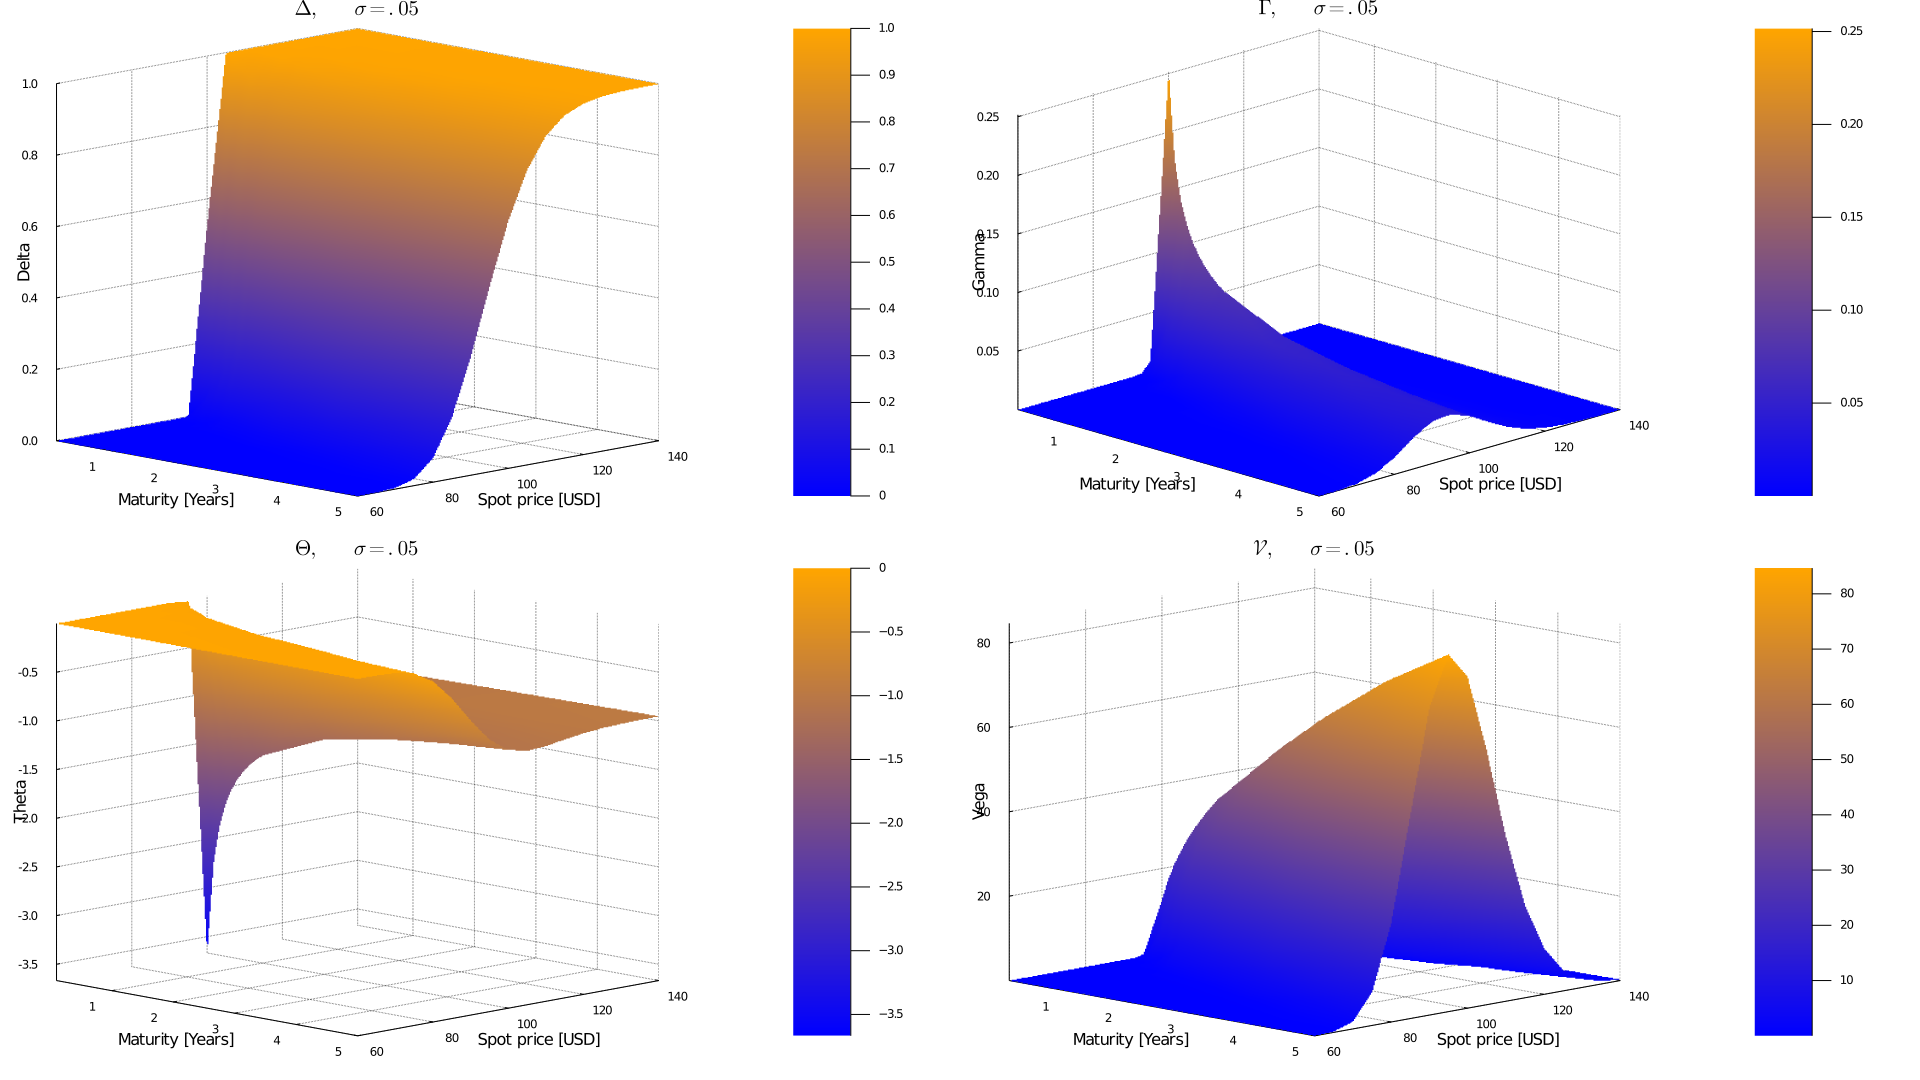

In [250]:
plot_price3 = Plots.plot(title = L"Price,\quad\quad\sigma=.05"      , T, S, price3,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta3 = Plots.plot(title = L"\Delta,\quad\quad\sigma=.05"     , T, S, delta3,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma3 = Plots.plot(title = L"\Gamma,\quad\quad\sigma=.05"     , T, S, gamma3,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta3 = Plots.plot(title = L"\Theta,\quad\quad\sigma=.05"     , T, S, theta3,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega3  = Plots.plot(title = L"\mathcal{V},\quad\quad\sigma=.05", T, S, vega3, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")

Plots.plot(plot_delta3, plot_gamma3, plot_theta3, plot_vega3, layout = (2, 2), size = (1920, 1080))
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)


In [251]:
Plots.plot(plot_delta3, plot_delta1, plot_delta2,
           plot_gamma3, plot_gamma1, plot_gamma2,
           plot_theta3, plot_theta1, plot_theta2,
           plot_vega3,   plot_vega1,  plot_vega2, layout = (4, 3), size = (1920, 1920))
Plots.plot!(gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)
Plots.savefig("figures/Greeks_1.pdf")

In [252]:
Plots.plot(plot_price3, plot_price1, plot_price2, layout = (1, 3), size = (1920, 480))
Plots.plot!(gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)
Plots.savefig("figures/Prices_1.pdf")

In [253]:
STOCK          = DataFrame(CSV.File("DATA/RUT.csv"))
S0             = STOCK.Close[length(STOCK.Close)]
INTEREST_RATES = [0.32814, 0.45514, 0.96686, 1.47200, 2.12586]
r              = [.0032814, .0045514, .00711, .0096686, .0113524, .0130362, .0147200, .0179893]

8-element Vector{Float64}:
 0.0032814
 0.0045514
 0.00711
 0.0096686
 0.0113524
 0.0130362
 0.01472
 0.0179893

In [254]:
#RUT = yf.Ticker("^RUT")
#expr = RUT.options
#opt = [RUT.option_chain(expr[i]) for i in 1:length(expr)]

#for (i, x) in enumerate(opt)
#    x[1].to_csv("DATA_yf/CALL_"*expr[i]*".csv")
#end

#RUT.history(period="5y").to_csv("DATA_yf/Stock.csv")

In [255]:
expr = ("2022-04-04", "2022-04-06", "2022-04-08", "2022-04-11", "2022-04-14", "2022-04-22", "2022-04-29", "2022-05-06", "2022-05-20", "2022-05-31", "2022-06-17", "2022-06-30", "2022-07-15", "2022-07-29", "2022-08-31", "2022-09-16", "2022-09-30", "2022-12-16", "2022-12-30", "2023-03-17", "2023-06-16", "2023-12-15", "2024-12-20")
CALLS = [DataFrame(CSV.File("DATA_yf/CALL_"*x*".csv")) for x in expr]
function Mid_Price( df )
    df[!,:Mid_Price] = ( df.ask .+ df.bid ) ./ 2
end

for i in 1:length(CALLS)
    Mid_Price(CALLS[i])
end

In [256]:
today = Date("2022-03-31") # Dates.today()

T = [bdayscount(:USSettlement, today, Date(x)) / 252 for x in expr]
Strikes = []
for i in 1:length(CALLS)
    Strikes = vcat(Strikes, CALLS[i].strike)
end
#Strikes .= clamp.(Strikes, 1950, 2150) 
Strikes = sort(unique(Strikes))

202-element Vector{Any}:
  400.0
  500.0
  700.0
  750.0
  800.0
  850.0
  900.0
  950.0
 1000.0
 1050.0
 1100.0
 1150.0
 1200.0
    ⋮
 2950.0
 3000.0
 3050.0
 3100.0
 3150.0
 3200.0
 3250.0
 3300.0
 3350.0
 3400.0
 3450.0
 3500.0

In [257]:
x = [CALLS[i].strike for i in 1:length(CALLS)]
mat = vcat(3, 5:7, 9:11,  18, 22)
Strikes = intersect( x[3], x[5], x[6], x[7], x[9],x[10], x[11], x[18], x[22])


10-element Vector{Float64}:
 1500.0
 1950.0
 2000.0
 2050.0
 2100.0
 2150.0
 2200.0
 2250.0
 2300.0
 2350.0

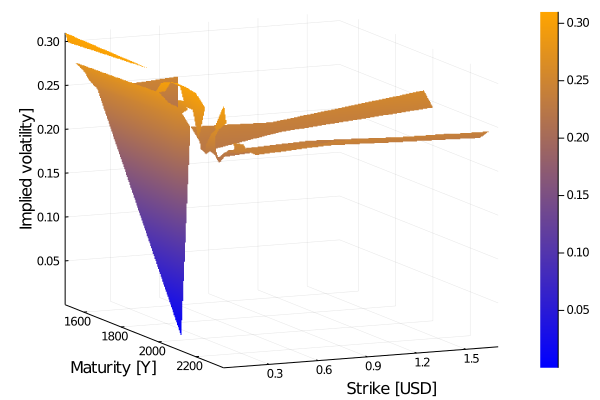

In [258]:
Plots.plot(Strikes, T[mat], impv_mat_real,st=:surface,color=my_cg, camera=(60,30), xlabel="Maturity [Y]", ylabel="Strike [USD]", zlabel="Implied volatility]")

In [259]:
#CSV.write("prova1.csv", Tables.table(impv_mat_real), writeheader=false)

In [260]:
layout = PlotlyJS.Layout(
    title="Implied volatility surface",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Implied Volatility",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=Strikes,
        y=T[mat],
        z=impv_mat_real,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

data: [
  "surface with fields contours, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [261]:
for c in CALLS
    for (i,x) in enumerate(c.impliedVolatility)
        if x < 0.1
            delete!(c, i)
        end
        if c.volume[i] === missing
            delete!(c, i)
        end
    end
end
Strikes = [CALLS[i].strike for i in 1:length(CALLS)]

impv_real = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].strike)) for i in 1:length(CALLS)]
for (j, call) in enumerate(CALLS)
    impv_real[j] = call.impliedVolatility
end


In [262]:
layout = PlotlyJS.Layout(
    title="Implied volatility",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Implied volatility",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

plots = [PlotlyJS.scatter(x=CALLS[i].strike, y=repeat([T[i]], length(impv_real[i])), z=impv_real[i], type="scatter3d", name = string(252*T[i]), mode="lines", line=attr(color="red", width=15)) for i in 1:length(impv_real)]

PlotlyJS.plot(plots,layout)

data: [
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z",
  "scatter3d with fields line, mode, name, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [264]:
impv_bs = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].strike)) for i in 1:length(CALLS)]
strikes = []
maturit = []
impv_p  = []
point   = Vector{Float64}[]

for (j, call) in enumerate(CALLS[mat])
    impv_real[j] = call.impliedVolatility
end

for j in 1:length(CALLS)
    for i in 1:length(CALLS[j].strike)
        try
            impv_bs[j][i] = CALLS[j].impliedVolatility[i]
            append!(strikes, CALLS[j].strike[i])
            append!(maturit, T[j])
            append!(impv_p, impv_bs[j][i])
            push!(point, [CALLS[j].strike[i], T[j], impv_bs[j][i]])
        catch y
            impv_bs[j][i] = missing
            #println(j,i)
        end
    end
end

point = getindex.(point, [1 2 3])

df = DataFrame(point, :auto)
rename!(df, ["Strike", "Maturity", "ImpliedVolatility"])
groupby(df, [:Strike, :Maturity])
CSV.write("CALLS.csv",df)

"CALLS.csv"

In [25]:
layout = PlotlyJS.Layout(
    title="Implied volatility surface tabulated in yf",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Implied Volatility",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.scatter(
        x=point[:,1],
        y=point[:,2],
        z=point[:,3],
        color=:species,
        type="scatter3d",
        mode="markers+surfaces",
        marker_size=1.5
        ), layout)

data: [
  "scatter3d with fields color, marker, mode, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [26]:
STOCK = DataFrame(CSV.File("DATA_yf/Stock.csv"))
p = PlotlyJS.plot(candlestick(x    =STOCK[!, "Date" ],
                              open =STOCK[!, "Open" ],
                              high =STOCK[!, "High" ],
                              low  =STOCK[!, "Low"  ],
                              close=STOCK[!, "Close"] ),
                  Layout(title="RUT stock Prices",
                         yaxis_title="RUT Stock [USD]")
    )

data: [
  "candlestick with fields close, high, low, open, type, and x"
]

layout: "layout with fields margin, template, title, and yaxis"

In [27]:
Year_Days = 252

function Return( df )
    df[!,:Return    ] =     ( df.Close - lag(df.Close, 1) ) ./ lag(df.Close, 1)
    df[!,:Return_LOG] = log.( df.Close                      ./ lag(df.Close, 1) )
end

Return( STOCK )

function Volatility( Returns, T, daily = false )
    T = floor(Int,T)
    VOL_DAILY  = std(skipmissing(Returns[length(Returns)-T:length(Returns)]))
    VOL_ANNUAL = VOL_DAILY * sqrt(Year_Days)
    if daily==false
        return VOL_ANNUAL
    end
    return VOL_DAILY, VOL_ANNUAL
end

VOL_ANNUAL = [Volatility( STOCK.Return, i*Year_Days ) for i in T]
S0         = STOCK.Close[length(STOCK.Close)]

2091.110107421875

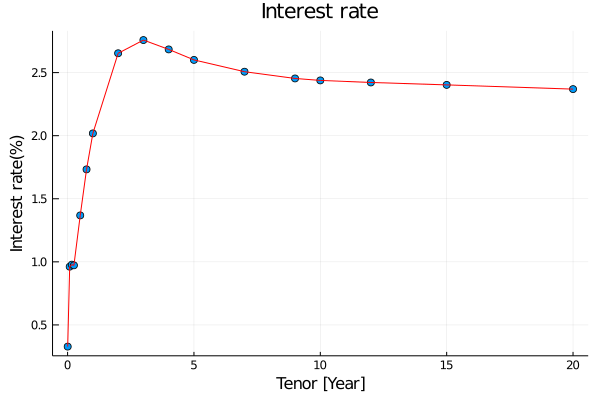

In [28]:
model(t, p) = p[1] .+ p[2] .* t .+ p[3] .* t.^2 .+ p[4] .* t.^3
tdata = [1/252, 1/12, 2/12, 3/12, 6/12, 9/12, 1, 2, 3, 4, 5, 7, 9, 10, 12, 15, 20]
ydata = [0.32814, 0.96167, 0.97770, 0.97236, 1.36804, 1.73292, 2.01817,
         2.65335, 2.75796, 2.68388, 2.60063, 2.50716, #2.45369,
         2.45369, 2.43816, 2.42175, 2.40266, 2.36917]
p0 = [.5, .5, .5, .5]

fit = [curve_fit(model, tdata[i:i+1], ydata[i:i+1], p0) for i in 1:length(tdata)-1] 
param = [fit[i].param for i in 1:length(fit)]

Plots.plot(tdata, ydata, seriestype = :scatter)
for i in 1:length(tdata)-1
    Plots.plot!(tdata[i:i+1], model(tdata, param[Int64(i)])[i:i+1], color="red")
end
Plots.plot!(legend=false, title="Interest rate", xlab = "Tenor [Year]", ylab="Interest rate(%)")
#Plots.plot!(T, r*100, seriestype = :scatter)
#Plots.savefig("figures/Interest_rate.pdf")

In [29]:
points = PlotlyJS.scatter(;x=tdata, y=ydata, mode="markers", marker=attr(size=12,color="red"), name="Tabulated IR")
lines  = Array{GenericTrace{Dict{Symbol, Any}}}(undef, length(tdata)-1)
for i in 1:length(lines)
    lines[i] = PlotlyJS.scatter(;x=tdata[i:i+1], y=model(tdata, param[Int64(i)])[i:i+1],mode="lines",line=attr(color="blue", dash="dashdot"), name="")
end

layout = Layout(title="Interest Rate", yaxis_title="Interest rate [%]", xaxis_title="Tenor [Years]", showlegend=false)

PlotlyJS.plot(vcat(points, lines), layout)
#PlotlyJS.plot(vcat(Plots_bls, Plots_impv, Plots_impv_yf), layout)

data: [
  "scatter with fields marker, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y"
]

layout: "layout with fields margin, showlegend, template, title, xaxis, and yaxis"

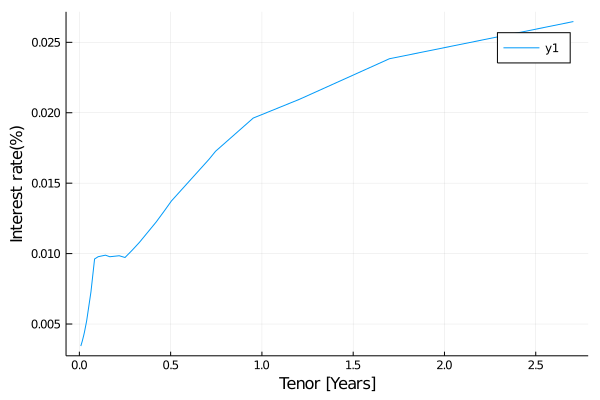

In [30]:
r = Array{Float64}(undef, length(T))
for (i, x) in enumerate(T)
    for j in 1:length(tdata)-1
        if x >= tdata[j] && x < tdata[j+1]
            r[i] = model(x, param[j]) / 100
        end
    end
end
Plots.plot(T, r, xlab="Tenor [Years]", ylab="Interest rate(%)")

In [31]:
Strikes = []
for i in 1:length(CALLS)
    Strikes = vcat(Strikes, CALLS[i].strike)
end
#Strikes .= clamp.(Strikes, 1250, 2750) 
Strikes = sort(unique(Strikes))

opt_price    = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_price_iv = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_delta    = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_gamma    = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_theta    = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_vega     = Array{Float64}(undef, length(CALLS), length(Strikes))
opt_impv     = Array{Union{Missing, Float64}}(undef, length(CALLS), length(Strikes))
for (i, c) in enumerate(CALLS)
    for (j,k) in enumerate(Strikes)
        opt_price[i, j] = blsprice(S0, k, r[i], T[i], VOL_ANNUAL[i])
        #println(T[i],  " ", k, " ", " ", r[i], " ", opt_price[i,j])
        opt_delta[i, j] = blsdelta(S0, k, r[i], T[i], VOL_ANNUAL[i])
        opt_gamma[i, j] = blsgamma(S0, k, r[i], T[i], VOL_ANNUAL[i])
        opt_theta[i, j] = blstheta(S0, k, r[i], T[i], VOL_ANNUAL[i])
        opt_vega[ i, j] = blsvega( S0, k, r[i], T[i], VOL_ANNUAL[i])
        try
            opt_impv[ i, j] = blsimpv( S0, k, r[i], T[i], opt_price[i,j])
            #opt_price_iv[i,j] = blsprice(S0, k, r[i], T[i], opt_impv)
        catch y
            opt_impv[ i, j] = missing
        end
    end
end

println(VOL_ANNUAL)

[0.24163681744774257, 0.28431750172274806, 0.23971261789374468, 0.248917474216401, 0.22566844925891666, 0.2523138951219757, 0.2662056343900915, 0.2773380364025747, 0.2755277536326151, 0.26547403763119115, 0.2748350467425812, 0.26829150801182206, 0.26215013639943907, 0.26555214358112594, 0.2548597276309965, 0.2479616198006432, 0.24192024526747616, 0.22884199489684035, 0.22806015797475168, 0.21998616358695133, 0.22826265337889712, 0.22697192745499017, 0.3090181553933714]


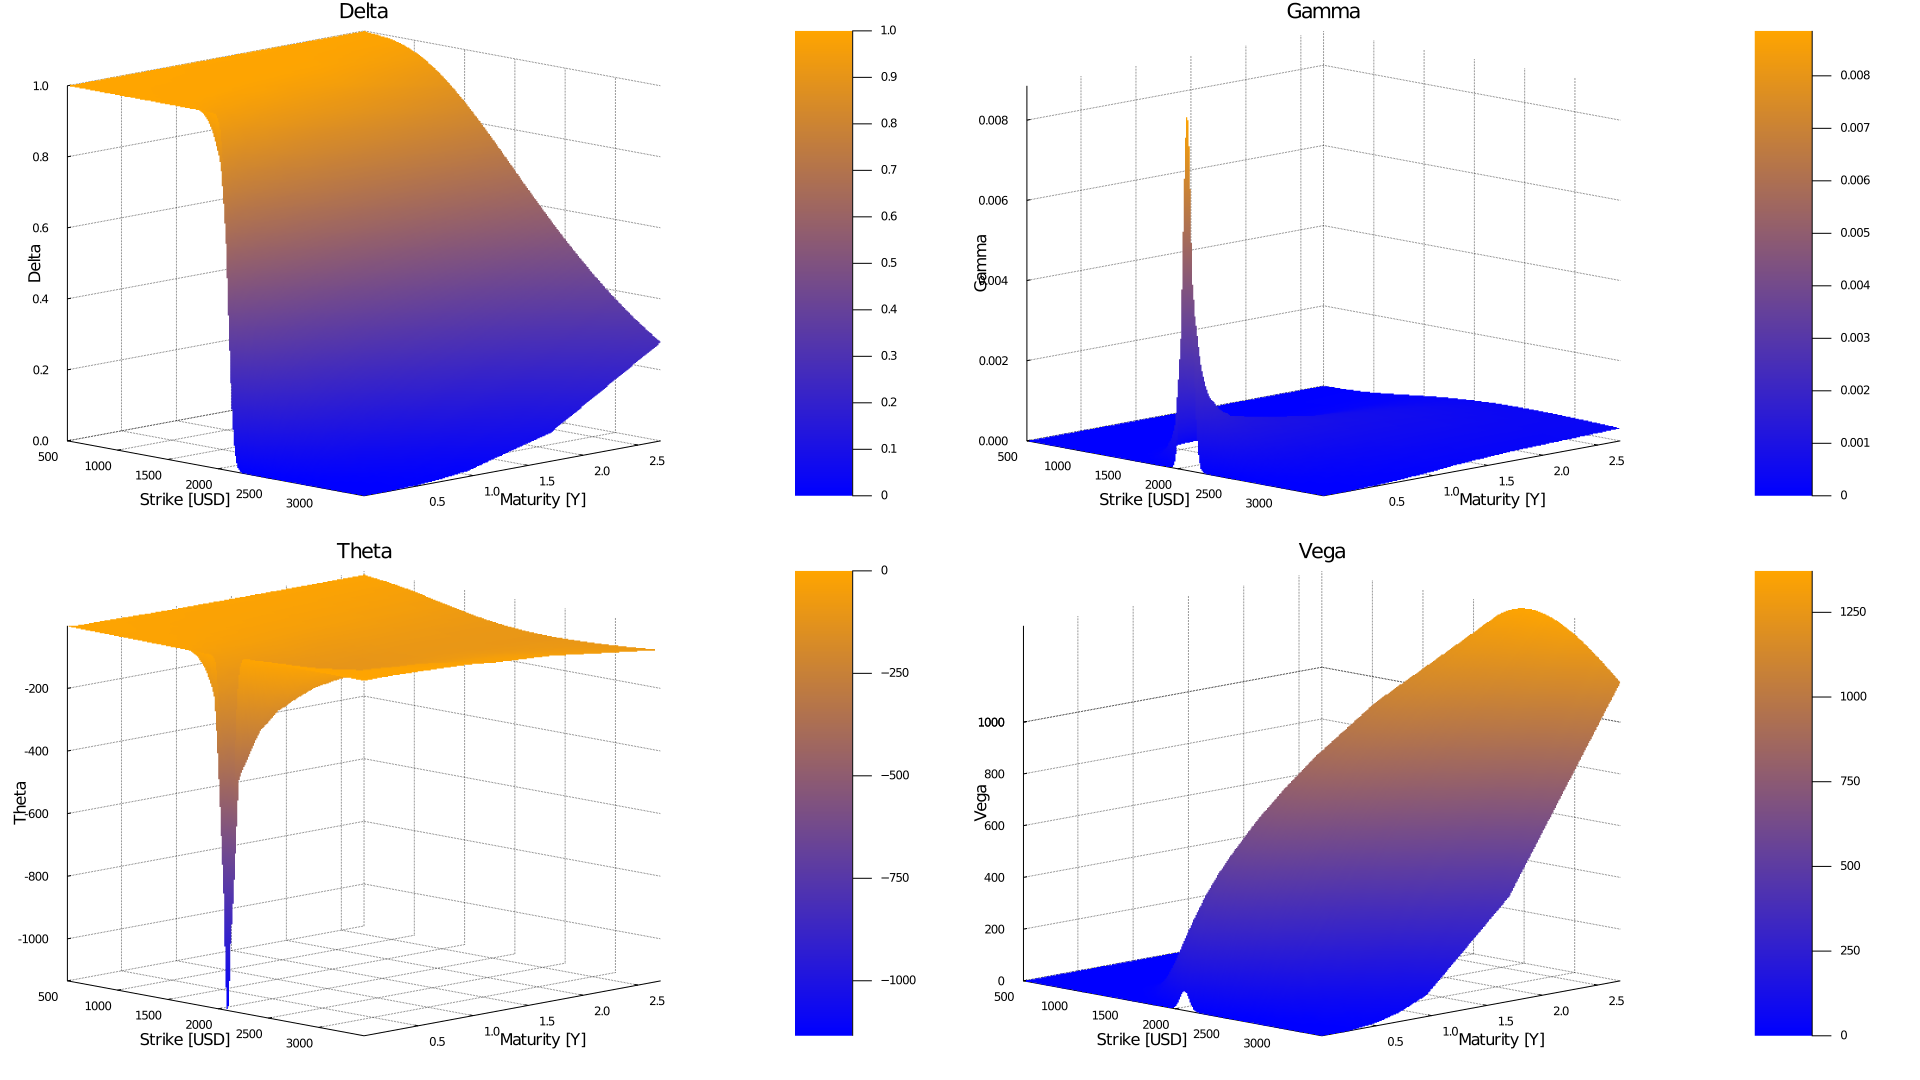

In [32]:
delta = Plots.plot(title = "Delta",Strikes,T,opt_delta,st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Delta")
gamma = Plots.plot(title = "Gamma",Strikes,T,opt_gamma,st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Gamma")
theta = Plots.plot(title = "Theta",Strikes,T,opt_theta,st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Theta")
vega  = Plots.plot(title = "Vega",Strikes,T,opt_vega, st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Vega")
pimpv = Plots.plot(title = "Implied Volatility",Strikes,T,opt_impv, st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Implied VOlatility")


l = @layout [
    a b
    c d e
]
Plots.plot(  delta, gamma, theta, vega, layout = (2, 2), size = (1920, 1080))
#price,
Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)
#Plots.savefig("figures/Greeks_RUT.pdf")

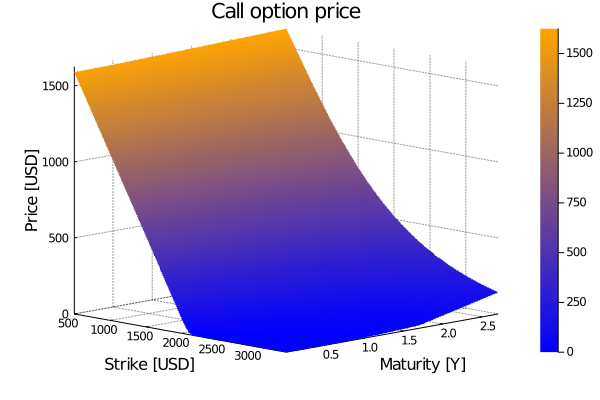

In [33]:
price = Plots.plot(title = "Call option price",Strikes,T,opt_price,st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Price [USD]")

Plots.plot(  price )

Plots.plot!(#gridcolor=:green,
            gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)
#Plots.savefig("figures/Price_RUT.pdf")

In [34]:
layout = PlotlyJS.Layout(
    title="Call option price surface",
    scene_yaxis_title="Moneyness [USD]",
    scene_xaxis_title="Maturity [Years]",
    scene_zaxis_title="Call option price [USD]",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=T,
        y=sort(Strikes),
        z=opt_price,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

data: [
  "surface with fields contours, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [35]:
deleteat!(CALLS, 19)
deleteat!(T, 19)
deleteat!(VOL_ANNUAL, 19)

22-element Vector{Float64}:
 0.24163681744774257
 0.28431750172274806
 0.23971261789374468
 0.248917474216401
 0.22566844925891666
 0.2523138951219757
 0.2662056343900915
 0.2773380364025747
 0.2755277536326151
 0.26547403763119115
 0.2748350467425812
 0.26829150801182206
 0.26215013639943907
 0.26555214358112594
 0.2548597276309965
 0.2479616198006432
 0.24192024526747616
 0.22884199489684035
 0.21998616358695133
 0.22826265337889712
 0.22697192745499017
 0.3090181553933714

In [36]:
strike1   = 2090.0
strike2   = 2100.0
strike3   = 2110.0
strike4   = 2070.0
strike5   = 2300.0
real_call = []
call_bs   = []
strikes   = []
impv      = []
for i in 1:length(CALLS)
    try
        append!(real_call, CALLS[i][CALLS[i].strike .== strike1, "Mid_Price"][1])
        append!(impv, CALLS[i][CALLS[i].strike .== strike1, "impliedVolatility"][1]) / 100
        append!(strikes, strike1)
    catch y
        try
            append!(real_call, CALLS[i][CALLS[i].strike .== strike2, "Mid_Price"][1])
            append!(impv, CALLS[i][CALLS[i].strike .== strike2, "impliedVolatility"][1]) / 100
            append!(strikes, strike2)
        catch y
            try
                append!(real_call, CALLS[i][CALLS[i].strike .== strike3, "Mid_Price"][1])
                append!(impv, CALLS[i][CALLS[i].strike .== strike3, "impliedVolatility"][1]) / 100
                append!(strikes, strike3)
            catch y
                try
                    append!(real_call, CALLS[i][CALLS[i].strike .== strike4, "Mid_Price"][1])
                    append!(impv, CALLS[i][CALLS[i].strike .== strike4, "impliedVolatility"][1]) / 100
                    append!(strikes, strike4)
                catch y
                    try
                        append!(real_call, CALLS[i][CALLS[i].strike .== strike5, "Mid_Price"][1])
                        append!(impv, CALLS[i][CALLS[i].strike .== strike5, "impliedVolatility"][1]) / 100
                        append!(strikes, strike5)
                    catch y
                        println("NO")
                        println(i)
                   end
                end
            end
        end
    end
end

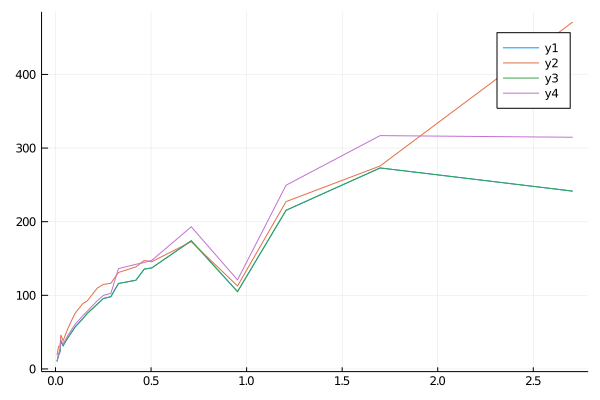

In [37]:
t_eff = copy(T)
id_del = []
for i in 1:length(real_call)
    if real_call[i] == 0
        append!(id_del, i)
    end
end

price_RUT       = Array{Float64}(undef, length(real_call))
iv              = Array{Float64}(undef, length(real_call))
price_RUT_iv    = Array{Float64}(undef, length(real_call))
price_RUT_iv_yf = Array{Float64}(undef, length(real_call))
for i in 1:length(real_call)
    price_RUT[      i] = blsprice(S0, strikes[i], r[i], t_eff[i], VOL_ANNUAL[i])
    iv[             i] = blsimpv( S0, strikes[i], r[i], t_eff[i], real_call[i])
    price_RUT_iv[   i] = blsprice(S0, strikes[i], r[i], t_eff[i], iv[i])
    price_RUT_iv_yf[i] = blsprice(S0, strikes[i], r[i], t_eff[i], impv[i])
end   

Plots.plot()
Plots.plot(t_eff, real_call)
Plots.plot!(t_eff, price_RUT)
Plots.plot!(t_eff, price_RUT_iv)
Plots.plot!(t_eff, price_RUT_iv_yf)

In [38]:
colors = ["red", "blue", "yellow", "green", "violet", "black"]
Plots_real    = PlotlyJS.scatter(;x=t_eff, y=real_call,    mode="markers+lines", line=attr(color="red", dash="solid"),   name="Real Mid-Price")
Plots_bls     = PlotlyJS.scatter(;x=t_eff, y=price_RUT,    mode="markers+lines", line=attr(color="blue", dash="dashdot"), name="BS hist. vol.")
Plots_impv    = PlotlyJS.scatter(;x=t_eff, y=price_RUT_iv, mode="markers+lines", line=attr(color="green", dash="dash"), name="BS I.V.")
Plots_impv_yf = PlotlyJS.scatter(;x=t_eff, y=price_RUT_iv_yf, mode="markers+lines", line=attr(color="yellow", dash="dashdot"), name="BS I.V yf")

layout = Layout(title="RUT option prices ATM", yaxis_title="Option prices [USD]", xaxis_title="Time to maturity [Years]")

PlotlyJS.plot(vcat(Plots_real, Plots_bls, Plots_impv, Plots_impv_yf), layout)
#PlotlyJS.plot(vcat(Plots_bls, Plots_impv, Plots_impv_yf), layout)

data: [
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y"
]

layout: "layout with fields margin, template, title, xaxis, and yaxis"

In [39]:
plot_hist = PlotlyJS.scatter(;x=t_eff, y=VOL_ANNUAL, mode="markers+lines", line=attr(color="red", dash="solid"),name="Hist. vol.")
plot_impv = PlotlyJS.scatter(;x=t_eff, y=iv, mode="markers+lines", line=attr(color="blue", dash="dashdot"),name="Imp. vol.")
plot_ivyf = PlotlyJS.scatter(;x=t_eff, y=impv, mode="markers+lines", line=attr(color="green", dash="dash"),name="Imp. vol. yf")
layout = Layout(title="RUT Volatility ATM", yaxis_title="Volatility", xaxis_title="Time to maturity [Years]")

PlotlyJS.plot(vcat(plot_hist,plot_impv, plot_ivyf), layout)

data: [
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y"
]

layout: "layout with fields margin, template, title, xaxis, and yaxis"

In [40]:
impv_bs = [Array{Union{Missing, Float64}}(undef, length(CALLS[i].strike)) for i in 1:length(CALLS)]
strikes = []
maturit = []
impv_p  = []
point   = Vector{Float64}[]
for j in 1:length(CALLS)
    for i in 1:length(CALLS[j].strike)
        try
            impv_bs[j][i] = blsimpv(S0, CALLS[j].strike[i], r[j], T[j], CALLS[j].Mid_Price[i])
            append!(strikes, CALLS[j].strike[i])
            append!(maturit, T[j])
            append!(impv_p, impv_bs[j][i])
            push!(point, [CALLS[j].strike[i], T[j], impv_bs[j][i]])
        catch y
            impv_bs[j][i] = missing
            #println(j,i)
        end
    end
end
#pimpv_bs = Plots.plot(title = "Implied Volatility",strikes,maturit,impv_bs, st=:surface,color=my_cg, camera=(45,30), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Implied VOlatility")

#Plots.plot(pimpv_bs)
point = getindex.(point, [1 2 3])


1092×3 Matrix{Float64}:
 2065.0  0.00793651  0.0951534
 2070.0  0.00793651  0.112401
 2075.0  0.00793651  0.118932
 2080.0  0.00793651  0.124253
 2085.0  0.00793651  0.128012
 2090.0  0.00793651  0.129279
 2100.0  0.00793651  0.132153
 2105.0  0.00793651  0.133817
 2110.0  0.00793651  0.135185
 2115.0  0.00793651  0.137087
 2120.0  0.00793651  0.13916
 2125.0  0.00793651  0.142828
 2130.0  0.00793651  0.146918
    ⋮                
 3350.0  1.69841     0.1869
 3400.0  1.69841     0.187961
 1900.0  2.70635     0.206712
 2000.0  2.70635     0.22493
 2100.0  2.70635     0.13055
 2150.0  2.70635     0.193051
 2200.0  2.70635     0.216478
 2400.0  2.70635     0.174524
 2700.0  2.70635     0.184465
 2800.0  2.70635     0.194572
 3150.0  2.70635     0.172516
 3200.0  2.70635     0.175087

In [41]:
Tables.table(point)

Tables.MatrixTable{Matrix{Float64}} with 1092 rows, 3 columns, and schema:
 :Column1  Float64
 :Column2  Float64
 :Column3  Float64

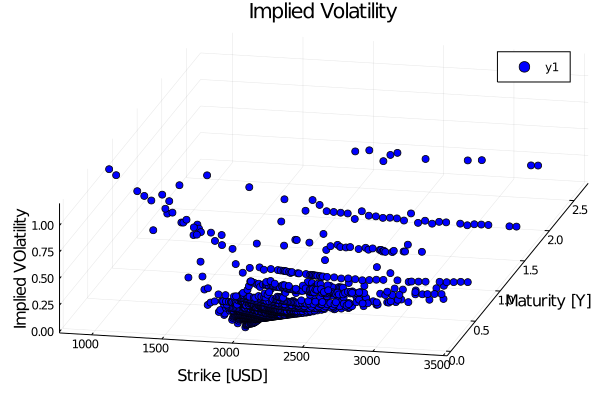

In [42]:
pimpv = Plots.scatter(title = "Implied Volatility",point[:,1],point[:,2],point[:,3],color=my_cg, camera=(20,65), xlabel="Strike [USD]", ylabel="Maturity [Y]", zlabel="Implied VOlatility")


In [43]:
layout = PlotlyJS.Layout(
    title="Implied volatility surface",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Implied Volatility",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.scatter(
        x=point[:,1],
        y=point[:,2],
        z=point[:,3],
        #color=:species,
        type="scatter3d",
        mode="markers",
        marker_size=5,
            contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
        ), layout)

data: [
  "scatter3d with fields contours, marker, mode, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

### Put options

In [265]:
K = 100
r = .01
vol = 0.2

S = collect(60:1:140)
T = collect(.1:.1:5)
#T = vcat(collect(.1:.1:.9), collect(1:1:5))

price1  = Array{Float64}(undef, length(S), length(T))
delta1  = Array{Float64}(undef, length(S), length(T))
gamma1  = Array{Float64}(undef, length(S), length(T))
theta1  = Array{Float64}(undef, length(S), length(T))
vega1   = Array{Float64}(undef, length(S), length(T))
rho1    = Array{Float64}(undef, length(S), length(T))
lambda1 = Array{Float64}(undef, length(S), length(T))
psi1    = Array{Float64}(undef, length(S), length(T))
vanna1  = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price1[i,j]  = blsprice( S[i], K, r, T[j], vol, 0, false)
    delta1[i,j]  = blsdelta( S[i], K, r, T[j], vol, 0, false)
    gamma1[i,j]  = blsgamma( S[i], K, r, T[j], vol, 0, false)
    theta1[i,j]  = blstheta( S[i], K, r, T[j], vol, 0, false)
    vega1[i,j]   = blsvega(  S[i], K, r, T[j], vol, 0, false)
    rho1[i,j]    = blsrho(   S[i], K, r, T[j], vol, 0, false)
    lambda1[i,j] = blslambda(S[i], K, r, T[j], vol, 0, false)
    psi1[i,j]    = blspsi(   S[i], K, r, T[j], vol, 0, false)
    vanna1[i,j]  = blsvanna( S[i], K, r, T[j], vol, 0, false)
end


vol = 0.5

price2  = Array{Float64}(undef, length(S), length(T))
delta2  = Array{Float64}(undef, length(S), length(T))
gamma2  = Array{Float64}(undef, length(S), length(T))
theta2  = Array{Float64}(undef, length(S), length(T))
vega2   = Array{Float64}(undef, length(S), length(T))
rho2    = Array{Float64}(undef, length(S), length(T))
lambda2 = Array{Float64}(undef, length(S), length(T))
psi2    = Array{Float64}(undef, length(S), length(T))
vanna2  = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price2[i,j]  = blsprice( S[i], K, r, T[j], vol, 0, false)
    delta2[i,j]  = blsdelta( S[i], K, r, T[j], vol, 0, false)
    gamma2[i,j]  = blsgamma( S[i], K, r, T[j], vol, 0, false)
    theta2[i,j]  = blstheta( S[i], K, r, T[j], vol, 0, false)
    vega2[i,j]   = blsvega(  S[i], K, r, T[j], vol, 0, false)
    rho2[i,j]    = blsrho(   S[i], K, r, T[j], vol, 0, false)
    lambda2[i,j] = blslambda(S[i], K, r, T[j], vol, 0, false)
    psi2[i,j]    = blspsi(   S[i], K, r, T[j], vol, 0, false)
    vanna2[i,j]  = blsvanna( S[i], K, r, T[j], vol, 0, false)
end


vol = 0.05

price3  = Array{Float64}(undef, length(S), length(T))
delta3  = Array{Float64}(undef, length(S), length(T))
gamma3  = Array{Float64}(undef, length(S), length(T))
theta3  = Array{Float64}(undef, length(S), length(T))
vega3   = Array{Float64}(undef, length(S), length(T))
rho3    = Array{Float64}(undef, length(S), length(T))
lambda3 = Array{Float64}(undef, length(S), length(T))
psi3    = Array{Float64}(undef, length(S), length(T))
vanna3  = Array{Float64}(undef, length(S), length(T))

for i in 1:length(S), j in 1:length(T)
    price3[i,j]  = blsprice( S[i], K, r, T[j], vol, 0, false)
    delta3[i,j]  = blsdelta( S[i], K, r, T[j], vol, 0, false)
    gamma3[i,j]  = blsgamma( S[i], K, r, T[j], vol, 0, false)
    theta3[i,j]  = blstheta( S[i], K, r, T[j], vol, 0, false)
    vega3[i,j]   = blsvega(  S[i], K, r, T[j], vol, 0, false)
    rho3[i,j]    = blsrho(   S[i], K, r, T[j], vol, 0, false)
    lambda3[i,j] = blslambda(S[i], K, r, T[j], vol, 0, false)
    psi3[i,j]    = blspsi(   S[i], K, r, T[j], vol, 0, false)
    vanna3[i,j]  = blsvanna( S[i], K, r, T[j], vol, 0, false)
end

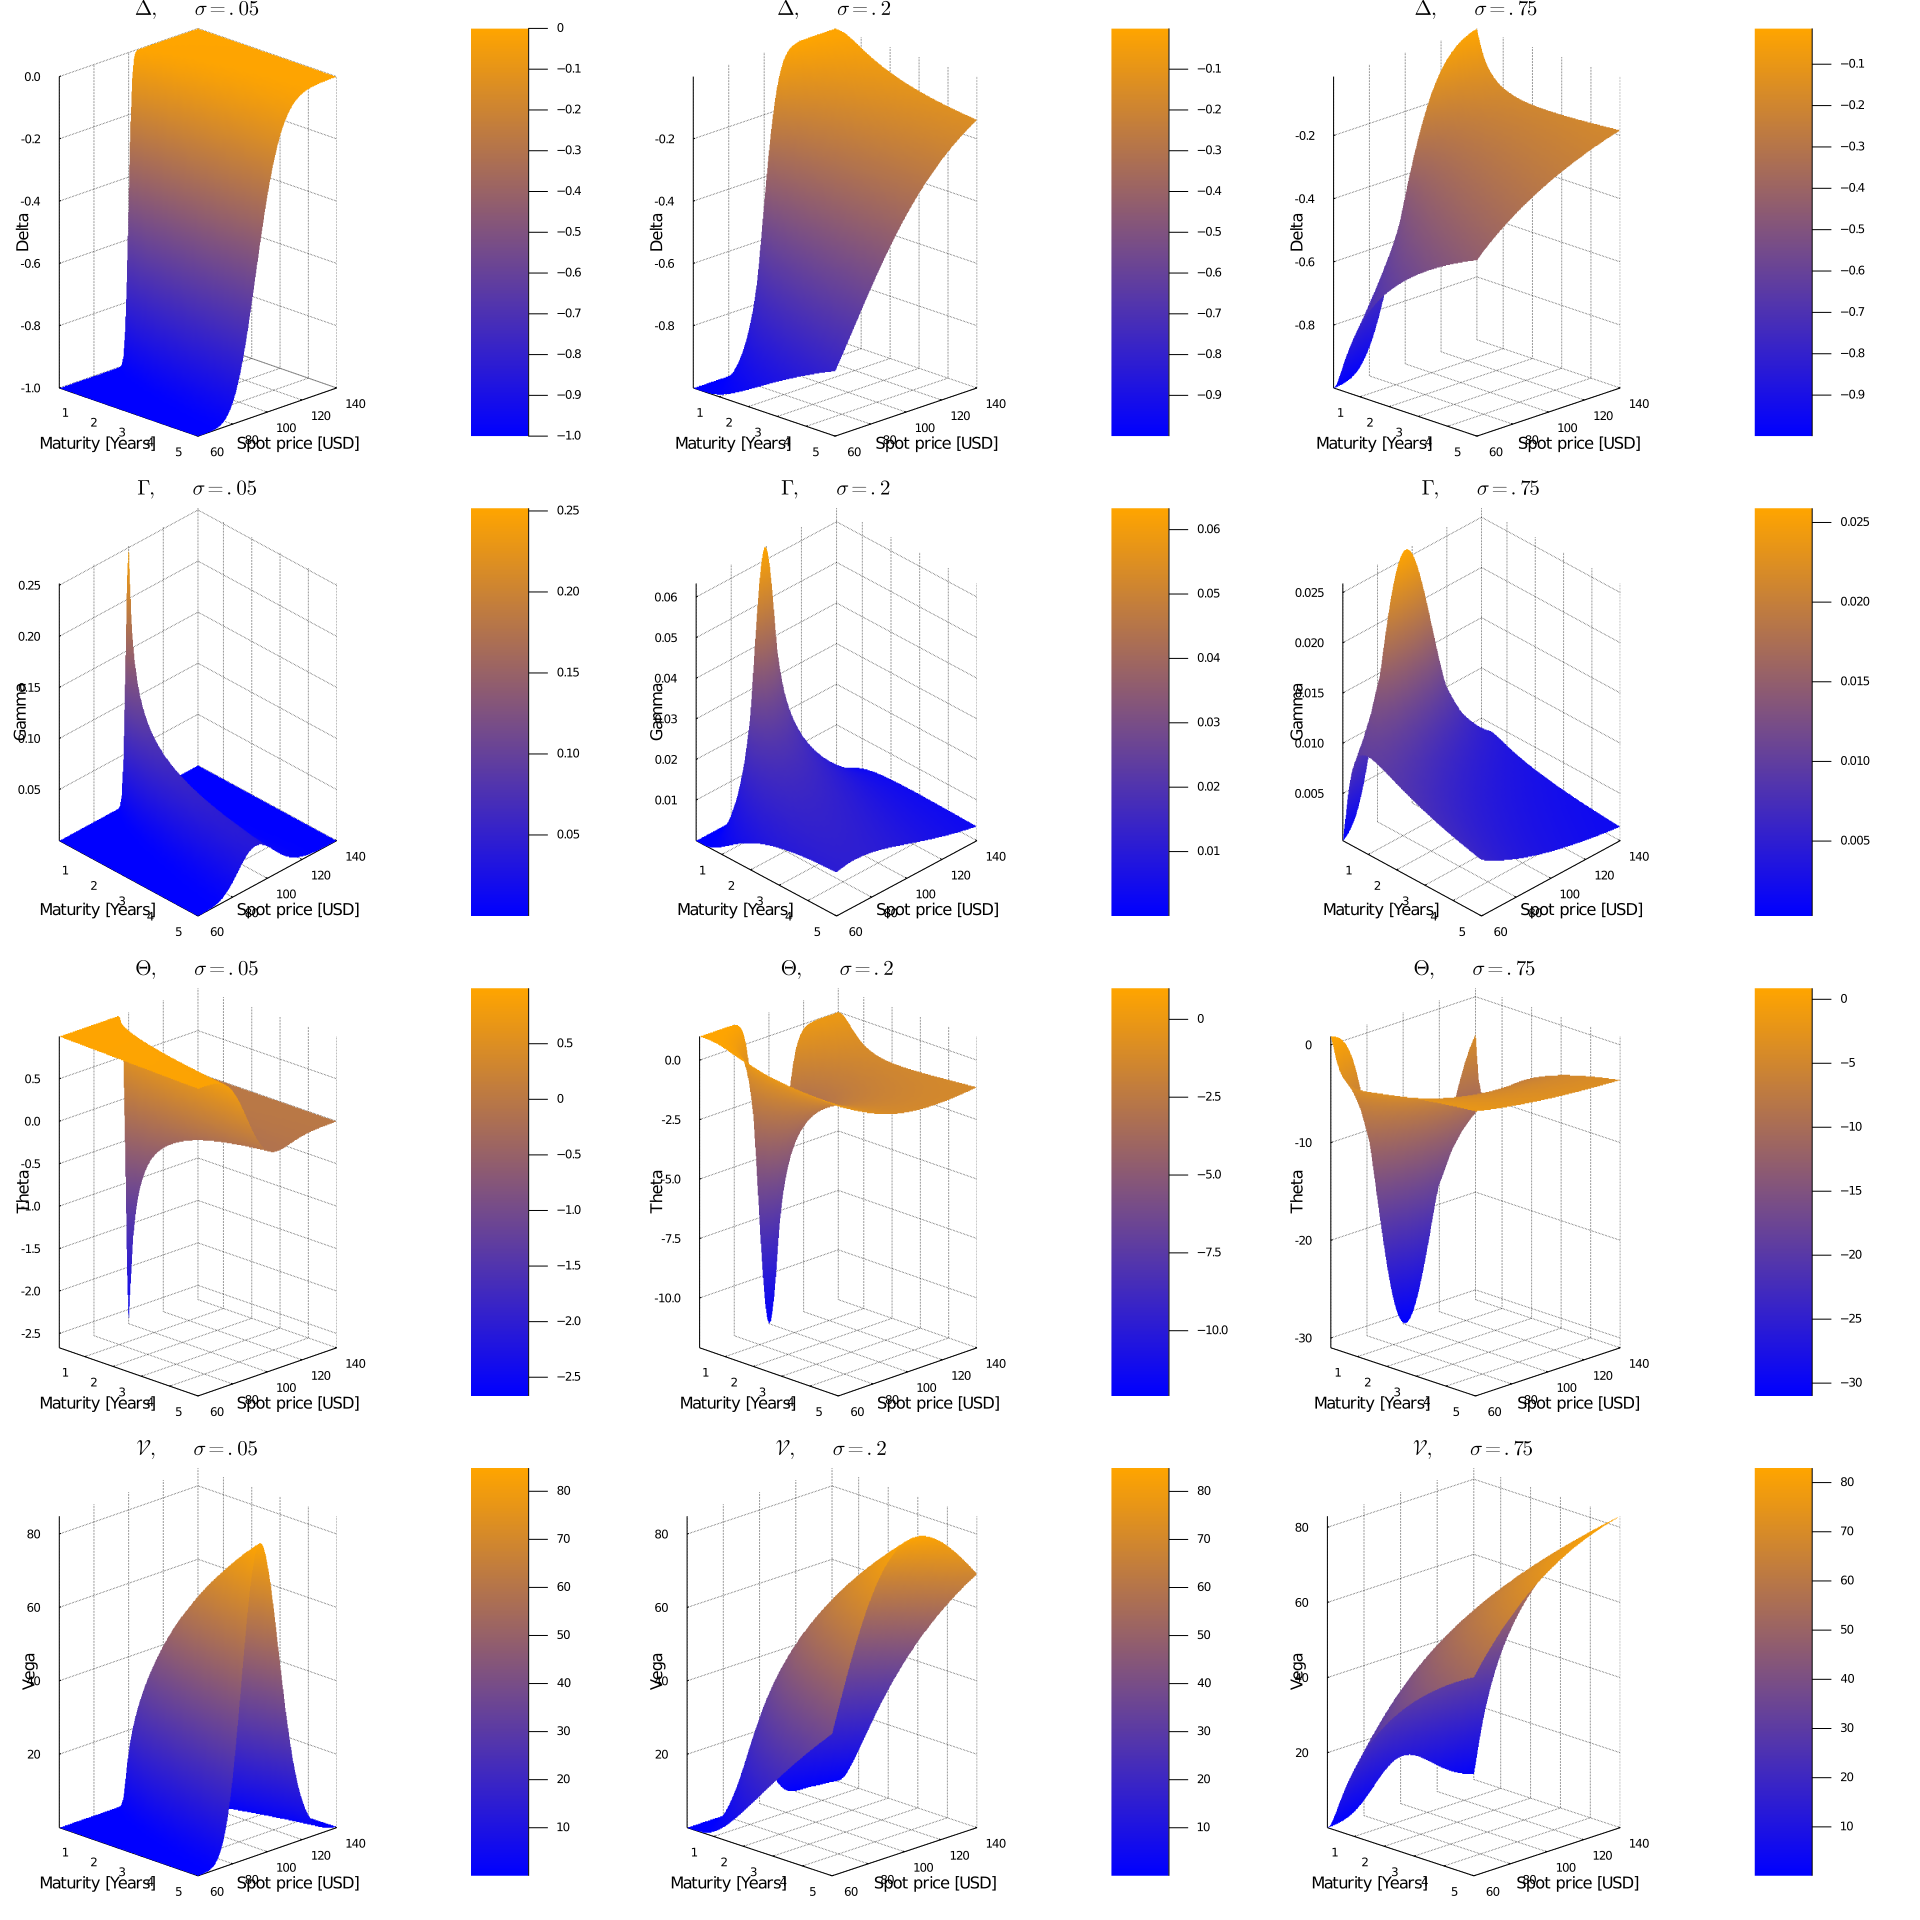

In [266]:
plot_price1 = Plots.plot(title = L"Price,\quad\quad\sigma=.2",T, S, price1,st=:surface,color=my_cg, camera=(60,70), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta1 = Plots.plot(title = L"\Delta,\quad\quad\sigma=.2",T, S, delta1,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma1 = Plots.plot(title = L"\Gamma,\quad\quad\sigma=.2",T, S, gamma1,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta1 = Plots.plot(title = L"\Theta,\quad\quad\sigma=.2",T, S, theta1,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega1  = Plots.plot(title = L"\mathcal{V},\quad\quad\sigma=.2",T, S, vega1, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")

plot_price2 = Plots.plot(title = L"Price,\quad\quad\sigma=.75"      ,T, S, price2,st=:surface,color=my_cg, camera=(60,70), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta2 = Plots.plot(title = L"\Delta,\quad\quad\sigma=.75"     ,T, S, delta2,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma2 = Plots.plot(title = L"\Gamma,\quad\quad\sigma=.75"     ,T, S, gamma2,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta2 = Plots.plot(title = L"\Theta,\quad\quad\sigma=.75"     ,T, S, theta2,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega2  = Plots.plot(title = L"\mathcal{V},\quad\quad\sigma=.75",T, S, vega2, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")

plot_price3 = Plots.plot(title = L"Price,\quad\quad\sigma=.05"      , T, S, price3,st=:surface,color=my_cg, camera=(60,70), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Call Option Price [USD]")
plot_delta3 = Plots.plot(title = L"\Delta,\quad\quad\sigma=.05"     , T, S, delta3,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Delta")
plot_gamma3 = Plots.plot(title = L"\Gamma,\quad\quad\sigma=.05"     , T, S, gamma3,color=my_cg,st=:surface, camera=(45,45), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Gamma")
plot_theta3 = Plots.plot(title = L"\Theta,\quad\quad\sigma=.05"     , T, S, theta3,st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Theta")
plot_vega3  = Plots.plot(title = L"\mathcal{V},\quad\quad\sigma=.05", T, S, vega3, st=:surface,color=my_cg, camera=(45,30), xlabel="Maturity [Years]", ylabel="Spot price [USD]", zlabel="Vega")

Plots.plot(plot_delta3, plot_delta1, plot_delta2,
           plot_gamma3, plot_gamma1, plot_gamma2,
           plot_theta3, plot_theta1, plot_theta2,
           plot_vega3,   plot_vega1,  plot_vega2, layout = (4, 3), size = (1920, 1920))
Plots.plot!(gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)
#Plots.savefig("figures/Greeks_PUT.pdf")

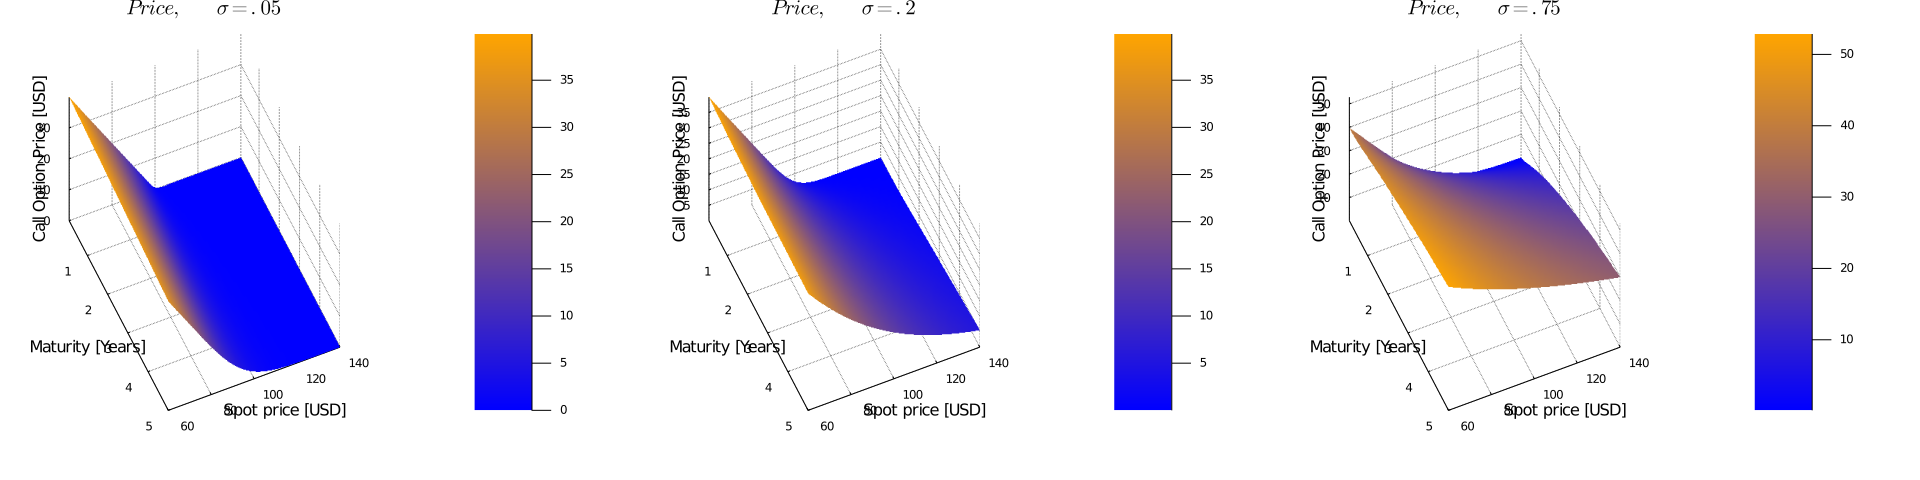

In [267]:
Plots.plot(plot_price3, plot_price1, plot_price2, layout = (1, 3), size = (1920, 480))
Plots.plot!(gridlinestyle=:dot,
            gridlinewidth=1,
            gridalpha=0.8)
#Plots.savefig("figures/prices_PUT.pdf")

In [268]:
#RUT = yf.Ticker("^RUT")
#expr = RUT.options
#opt = [RUT.option_chain(expr[i]) for i in 1:length(expr)]

#for (i, x) in enumerate(opt)
#    x[2].to_csv("DATA_yf/PUT_"*expr[i]*".csv")
#end
expr

("2022-04-04", "2022-04-06", "2022-04-08", "2022-04-11", "2022-04-14", "2022-04-22", "2022-04-29", "2022-05-06", "2022-05-20", "2022-05-31", "2022-06-17", "2022-06-30", "2022-07-15", "2022-07-29", "2022-08-31", "2022-09-16", "2022-09-30", "2022-12-16", "2022-12-30", "2023-03-17", "2023-06-16", "2023-12-15", "2024-12-20")

In [269]:
expr = ("2022-04-06", "2022-04-08", "2022-04-11", "2022-04-13", "2022-04-14", "2022-04-18", "2022-04-22", "2022-04-29", "2022-05-06", "2022-05-13", "2022-05-20", "2022-05-31", "2022-06-17", "2022-06-30", "2022-07-15", "2022-07-29", "2022-08-31", "2022-09-16", "2022-09-30", "2022-12-16", "2022-12-30", "2023-03-17", "2023-06-16", "2023-12-15", "2024-12-20")
PUTS = [DataFrame(CSV.File("DATA_yf/PUT_"*x*".csv")) for x in expr]

for i in 1:length(PUTS)
    Mid_Price(PUTS[i])
end

today = Date("2022-03-31") # Dates.today()

T = [bdayscount(:USSettlement, today, Date(x)) / 252 for x in expr]
Strikes = []
for i in 1:length(PUTS)
    Strikes = vcat(Strikes, PUTS[i].strike)
end
#Strikes .= clamp.(Strikes, 1950, 2150) 
Strikes = sort(unique(Strikes))

impv_real = [Array{Union{Missing, Float64}}(undef, length(PUTS[i].strike)) for i in 1:length(PUTS)]
for (j, put) in enumerate(PUTS)
    impv_real[j] = put.impliedVolatility
end

impv_bs = [Array{Union{Missing, Float64}}(undef, length(PUTS[i].strike)) for i in 1:length(PUTS)]
strikes = []
maturit = []
impv_p  = []
point   = Vector{Float64}[]

for (j, put) in enumerate(PUTS[mat])
    impv_real[j] = put.impliedVolatility
end

for j in 1:length(PUTS)
    for i in 1:length(PUTS[j].strike)
        try
            if PUTS[j].impliedVolatility[i] > .2
                impv_bs[j][i] = PUTS[j].impliedVolatility[i]
                append!(strikes, PUTS[j].strike[i])
                append!(maturit, T[j])
                append!(impv_p, impv_bs[j][i])
                push!(point, [PUTS[j].strike[i], T[j], impv_bs[j][i]])
            end
        catch y
            impv_bs[j][i] = missing
            #println(j,i)
        end
    end
end

point = getindex.(point, [1 2 3])
#CSV.write("PUT.csv",  Tables.table(A), writeheader=false)
df = DataFrame(point, :auto)
rename!(df, ["Strike", "Maturity", "ImpliedVolatility"])
groupby(df, [:Strike, :Maturity])
CSV.write("PUT.csv",df)

"PUT.csv"

In [270]:
layout = PlotlyJS.Layout(
    title="Implied volatility surface tabulated in yf",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Implied Volatility",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.scatter(
        x=point[:,1],
        y=point[:,2],
        z=point[:,3],
        color=:species,
        type="scatter3d",
        mode="markers",
        marker_size=1.5
        ), layout)

data: [
  "scatter3d with fields color, marker, mode, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [98]:
strike1   = 2090.0
strike2   = 2100.0
strike3   = 2110.0
strike4   = 2070.0
strike5   = 2300.0
real_put = []
put_bs   = []
strikes   = []
impv      = []
for i in 1:length(PUTS)
    try
        append!(real_put, PUTS[i][PUTS[i].strike .== strike1, "Mid_Price"][1])
        append!(impv, PUTS[i][PUTS[i].strike .== strike1, "impliedVolatility"][1]) / 100
        append!(strikes, strike1)
    catch y
        try
            append!(real_put, PUTS[i][PUTS[i].strike .== strike2, "Mid_Price"][1])
            append!(impv, PUTS[i][PUTS[i].strike .== strike2, "impliedVolatility"][1]) / 100
            append!(strikes, strike2)
        catch y
            try
                append!(real_put, PUTS[i][PUTS[i].strike .== strike3, "Mid_Price"][1])
                append!(impv, PUTS[i][PUTS[i].strike .== strike3, "impliedVolatility"][1]) / 100
                append!(strikes, strike3)
            catch y
                try
                    append!(real_put, PUTS[i][PUTS[i].strike .== strike4, "Mid_Price"][1])
                    append!(impv, PUTS[i][PUTS[i].strike .== strike4, "impliedVolatility"][1]) / 100
                    append!(strikes, strike4)
                catch y
                    try
                        append!(real_put, PUTS[i][PUTS[i].strike .== strike5, "Mid_Price"][1])
                        append!(impv, PUTS[i][PUTS[i].strike .== strike5, "impliedVolatility"][1]) / 100
                        append!(strikes, strike5)
                    catch y
                        println("NO")
                        println(i)
                   end
                end
            end
        end
    end
end

In [99]:
import FinancialToolbox.brentMethod, FinancialToolbox.blsimpv, FinancialToolbox.blscheck

"Brent Method: Scalar Equation Solver"
function brentMethod(f::Function, x0::Number, x1::Number, xtol::AbstractFloat = 1e-14, ytol::AbstractFloat = 1e-15, maxiter::Number = 80)
    if xtol < 0.0
        throw(ErrorException("x tollerance cannot be negative"))
    end
    if ytol < 0.0
        throw(ErrorException("y tollerance cannot be negative"))
    end
    EPS = eps(x0)
    y0 = f(x0)
    y1 = f(x1)
    if (y0 * y1 > 0)
        throw(DomainError("There is no such volatility"))
    end
    if abs(y0) < abs(y1)
        # Swap lower and upper bounds.
        x0, x1 = x1, x0
        y0, y1 = y1, y0
    end
    x2 = x0
    y2 = y0
    x3 = x2
    bisection = true
    for _ = 1:maxiter
        # x-tolerance.
        if abs(x1 - x0) < xtol
            return x1
        end

        # Use inverse quadratic interpolation if f(x0)!=f(x1)!=f(x2)
        # and linear interpolation (secant method) otherwise.
        if abs(y0 - y2) > ytol && abs(y1 - y2) > ytol
            x = x0 * y1 * y2 / ((y0 - y1) * (y0 - y2)) + x1 * y0 * y2 / ((y1 - y0) * (y1 - y2)) + x2 * y0 * y1 / ((y2 - y0) * (y2 - y1))
        else
            x = x1 - y1 * (x1 - x0) / (y1 - y0)
        end

        # Use bisection method if satisfies the conditions.
        delta = abs(2EPS * abs(x1))
        min1 = abs(x - x1)
        min2 = abs(x1 - x2)
        min3 = abs(x2 - x3)
        if (x < (3x0 + x1) / 4 && x > x1) || (bisection && min1 >= min2 / 2) || (!bisection && min1 >= min3 / 2) || (bisection && min2 < delta) || (!bisection && min3 < delta)
            x = (x0 + x1) / 2
            bisection = true
        else
            bisection = false
        end
        y = f(x)
        if abs(x - x0) < xtol
            return x
        end
        x3 = x2
        x2 = x1
        if sign(y0) != sign(y)
            x1 = x
            y1 = y
        else
            x0 = x
            y0 = y
        end

        if abs(y0) < abs(y1)
            # Swap lower and upper bounds.
            x0, x1 = x1, x0
            y0, y1 = y1, y0
        end
    end
    throw(ErrorException("Max iteration exceeded, possible wrong result"))
end

export blsimpv
"""
Black & Scholes Implied Volatility for European Options

		σ=blsimpv(S0,K,r,T,Price,d=0.0,FlagIsCall=true,xtol=1e-14,ytol=1e-15)

Where:\n
		S0         = Value of the Underlying.
		K          = Strike Price of the Option.
		r          = Zero Rate.
		T          = Time to Maturity of the Option.
		Price      = Price of the Option.
		d          = Implied Dividend of the Underlying.
		FlagIsCall = true for Call Options, false for Put Options.

		σ          = implied volatility of the European Option.

# Example
```julia-repl
julia> blsimpv(10.0,10.0,0.01,2.0,2.0)
0.3433730534290586
```
"""
function blsimpv(S0::num1, K::num2, r::num3, T::num4, Price::num5, d::num6 = 0.0, FlagIsCall::Bool = true, xtol::Real = 1e-14, ytol::Real = 1e-15, maxiter::Real=80) where {num1 <: Real, num2 <: Real, num3 <: Real, num4 <: Real, num5 <: Real, num6 <: Real}
    if (Price < num5(0))
        throw(ErrorException("Option Price Cannot Be Negative"))
    end
    blscheck(S0, K, r, T, 0.1, d)
    f(x) = (blsprice(S0, K, r, T, x, d, FlagIsCall) - Price)
    σ = brentMethod(f, 0.001, 1.2, xtol, ytol, maxiter)

    return σ
end

FinancialToolbox.blsimpv

In [100]:
model(t, p) = p[1] .+ p[2] .* t .+ p[3] .* t.^2 .+ p[4] .* t.^3
tdata = [1/252, 1/12, 2/12, 3/12, 6/12, 9/12, 1, 2, 3, 4, 5, 7, 9, 10, 12, 15, 20]
ydata = [0.32814, 0.96167, 0.97770, 0.97236, 1.36804, 1.73292, 2.01817,
         2.65335, 2.75796, 2.68388, 2.60063, 2.50716, #2.45369,
         2.45369, 2.43816, 2.42175, 2.40266, 2.36917]
p0 = [.5, .5, .5, .5]

fit = [curve_fit(model, tdata[i:i+1], ydata[i:i+1], p0) for i in 1:length(tdata)-1] 
param = [fit[i].param for i in 1:length(fit)]

r = Array{Float64}(undef, length(T))
for (i, x) in enumerate(T)
    for j in 1:length(tdata)-1
        if x >= tdata[j] && x < tdata[j+1]
            r[i] = model(x, param[j]) / 100
        end
    end
end

In [101]:
VOL_ANNUAL = [Volatility( STOCK.Return, i*Year_Days ) for i in T]

deleteat!(PUTS, 19)
deleteat!(real_put, 19)
deleteat!(T, 19)
deleteat!(VOL_ANNUAL, 19)

24-element Vector{Float64}:
 0.28431750172274806
 0.23971261789374468
 0.248917474216401
 0.23257991778769097
 0.22566844925891666
 0.251518548767797
 0.2523138951219757
 0.2662056343900915
 0.2773380364025747
 0.27624807842067384
 0.2755277536326151
 0.26547403763119115
 0.2748350467425812
 0.26829150801182206
 0.26215013639943907
 0.26555214358112594
 0.2548597276309965
 0.2479616198006432
 0.22884199489684035
 0.22806015797475168
 0.21998616358695133
 0.22826265337889712
 0.22697192745499017
 0.3090181553933714

In [102]:
t_eff = copy(T)

price_RUT       = Array{Float64}(undef, length(real_put))
iv              = Array{Float64}(undef, length(real_put))
price_RUT_iv    = Array{Float64}(undef, length(real_put))
price_RUT_iv_yf = Array{Float64}(undef, length(real_put))
for i in 1:length(real_put)
    price_RUT[      i] = blsprice(S0, strikes[i], r[i], t_eff[i], VOL_ANNUAL[i],0,false)
    iv[             i] = blsimpv( S0, strikes[i], r[i], t_eff[i], real_put[i], 0, false, 1e-14, 1e-15, 2000)
    price_RUT_iv[   i] = blsprice(S0, strikes[i], r[i], t_eff[i], iv[i],0,false)
    price_RUT_iv_yf[i] = blsprice(S0, strikes[i], r[i], t_eff[i], impv[i],0,false)
end   

In [103]:
colors = ["red", "blue", "yellow", "green", "violet", "black"]
Plots_real    = PlotlyJS.scatter(;x=t_eff, y=real_put,    mode="markers+lines", line=attr(color="red", dash="solid"),   name="Real Mid-Price")
Plots_bls     = PlotlyJS.scatter(;x=t_eff, y=price_RUT,    mode="markers+lines", line=attr(color="blue", dash="dashdot"), name="BS hist. vol.")
Plots_impv    = PlotlyJS.scatter(;x=t_eff, y=price_RUT_iv, mode="markers+lines", line=attr(color="green", dash="dash"), name="BS I.V.")
Plots_impv_yf = PlotlyJS.scatter(;x=t_eff, y=price_RUT_iv_yf, mode="markers+lines", line=attr(color="yellow", dash="dashdot"), name="BS I.V yf")

layout = Layout(title="RUT option prices ATM", yaxis_title="Option prices [USD]", xaxis_title="Time to maturity [Years]")

PlotlyJS.plot(vcat(Plots_real, Plots_bls, Plots_impv, Plots_impv_yf), layout)
#PlotlyJS.plot(vcat(Plots_bls, Plots_impv, Plots_impv_yf), layout)

data: [
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y"
]

layout: "layout with fields margin, template, title, xaxis, and yaxis"

In [104]:
plot_hist = PlotlyJS.scatter(;x=t_eff, y=VOL_ANNUAL, mode="markers+lines", line=attr(color="red", dash="solid"),name="Hist. vol.")
plot_impv = PlotlyJS.scatter(;x=t_eff, y=iv, mode="markers+lines", line=attr(color="blue", dash="dashdot"),name="Imp. vol.")
plot_ivyf = PlotlyJS.scatter(;x=t_eff, y=impv, mode="markers+lines", line=attr(color="green", dash="dash"),name="Imp. vol. yf")
layout = Layout(title="RUT Volatility ATM", yaxis_title="Volatility", xaxis_title="Time to maturity [Years]")

PlotlyJS.plot(vcat(plot_hist,plot_impv, plot_ivyf), layout)

data: [
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y",
  "scatter with fields line, mode, name, type, x, and y"
]

layout: "layout with fields margin, template, title, xaxis, and yaxis"

In [193]:
today = Date("2022-03-31") # Dates.today()

T = [bdayscount(:USSettlement, today, Date(x)) / 252 for x in expr]
Strikes = []
for i in 1:length(PUTS)
    Strikes = vcat(Strikes, PUTS[i].strike)
end
#Strikes .= clamp.(Strikes, 1950, 2150) 
Strikes = sort(unique(Strikes))

263-element Vector{Any}:
  400.0
  500.0
  600.0
  700.0
  750.0
  800.0
  850.0
  900.0
  950.0
 1000.0
 1050.0
 1080.0
 1100.0
    ⋮
 2600.0
 2650.0
 2700.0
 2800.0
 2850.0
 2900.0
 3000.0
 3100.0
 3200.0
 3250.0
 3350.0
 3400.0

In [217]:
x = [PUTS[i].strike for i in 1:length(PUTS)]
mat = vcat(3, 5:7, 9:11,  18, 22)
Strikes = intersect( x[1], x[2], x[3], x[4], x[5], x[7], x[8], x[9], x[11], x[12], x[13], x[14], x[19])


10-element Vector{Float64}:
 1900.0
 1910.0
 1950.0
 1960.0
 2000.0
 2040.0
 2070.0
 2080.0
 2090.0
 2120.0

In [218]:
impv_real = [Array{Union{Missing, Float64}}(undef, length(PUTS[i].strike)) for i in 1:length(PUTS[mat])]

for (j, put) in enumerate(PUTS[mat])
    impv_real[j] = put.impliedVolatility
end
print(Strikes)
impv_mat_real = Array{Union{Missing, Float64}}(undef, length(Strikes), length(PUTS[mat]))
for (i, put) in enumerate(PUTS[mat])
    for j in 1:length(Strikes)
        a = -1
        for k in 1:length(put.strike)
            if put.strike[k] == Strikes[j]
                a = k
                #break
            end
        end
        impv_mat_real[j,i] = a == -1 ? missing : impv_real[i][a]
    end
end

[1900.0, 1910.0, 1950.0, 1960.0, 2000.0, 2040.0, 2070.0, 2080.0, 2090.0, 2120.0]

In [219]:
layout = PlotlyJS.Layout(
    title="Implied volatility surface",
    scene_yaxis_title="Maturity [Years]",
    scene_xaxis_title="Moneyness [UDS]",
    scene_zaxis_title="Implied Volatility",
    autosize=false,
    scene_camera_eye=attr(x=1.87, y=0.88, z=0.64),
    width=1000, height=1000,
    margin=attr(l=65, r=50, b=65, t=90)
)

PlotlyJS.plot(PlotlyJS.surface(
        x=Strikes,
        y=T[mat],
        z=impv_mat_real,
        contours_z=attr(
            show=true,
            usecolormap=true,
            highlightcolor="limegreen",
            project_z=true
        )
), layout)

data: [
  "surface with fields contours, type, x, y, and z"
]

layout: "layout with fields autosize, height, margin, scene, template, title, and width"

In [226]:
@less blsdelta(S0, K[1],r[1], T[1], VOL_ANNUAL[1], 0, false)

"""
Cumulative Distribution Function of a Standard Gaussian Random Variable

		y=normcdf(x)

Where:\n
		x         = point of evaluation.

		y      = probability that a standard gaussian random variable is below x.

# Example
```julia-repl
julia> normcdf(0.0)
0.5
```
"""
function normcdf(x::number) where {number <: Number}
    return (1.0 + erf(x / sqrt(2.0))) / 2.0
end

"""
Probability Distribution Function of a Standard Gaussian Random Variable

		y=normpdf(x)

Where:\n
		x         = point of evaluation.

		y      = value.

# Example
```julia-repl
julia> normpdf(0.0)
0.3989422804014327
```
"""
function normpdf(x::number) where {number <: Number}
    return exp(-0.5 * x .^ 2) / sqrt(2 * pi)
end

"""
Black & Scholes Price for European Options

		Price=blsprice(S0,K,r,T,σ,d=0.0,FlagIsCall=true)

Where:\n
		S0         = Value of the Underlying.
		K          = Strike Price of the Option.
		r          = Zero Rate.
		T          = Time to Maturity of the Option.
		σ          = Implied Volatil

        if abs(y0) < abs(y1)
            # Swap lower and upper bounds.
            x0, x1 = x1, x0
            y0, y1 = y1, y0
        end
    end
    throw(ErrorException("Max iteration exceeded, possible wrong result"))
end

export blsimpv
"""
Black & Scholes Implied Volatility for European Options

		σ=blsimpv(S0,K,r,T,Price,d=0.0,FlagIsCall=true,xtol=1e-14,ytol=1e-15)

Where:\n
		S0         = Value of the Underlying.
		K          = Strike Price of the Option.
		r          = Zero Rate.
		T          = Time to Maturity of the Option.
		Price      = Price of the Option.
		d          = Implied Dividend of the Underlying.
		FlagIsCall = true for Call Options, false for Put Options.

		σ          = implied volatility of the European Option.

# Example
```julia-repl
julia> blsimpv(10.0,10.0,0.01,2.0,2.0)
0.3433730534290586
```
"""
function blsimpv(S0::num1, K::num2, r::num3, T::num4, Price::num5, d::num6 = 0.0, FlagIsCall::Bool = true, xtol::Real = 1e-14, ytol::Real = 1e-15) where {num1 <

In [ ]:
K = 100
r = .01
vol = 0.2
d = 0

S = collect(60:1:140)
T = collect(.1:.1:5)

d1 = (log(S[1] / K) + (r - d + vol * vol * 0.5) * T[1]) / (vol * sqrt(T[1]))
normcdf(-d1)